# Americium Cut based on Phi Position
The purpose of this notebook is to outline the Americium cut, following Matt's work [here (login required)](https://zzz.physics.umn.edu/!cdms/cdms/k100/run_summary/run_76/am_source_cut).

## Data Quality Cut
We begin by following the referenced [data quality cut page](https://zzz.physics.umn.edu/!cdms/cdms/k100/run_summary/run_76/data_quality_cuts#example).

In [1]:
#Imports
import sys
import numpy as np              #Will be used for binning
import pandas as pd             #Will be used for data structuring
import lmfit as lf
import matplotlib.pyplot as plt #Basic plotting library
sys.path.append('../python')
from R76Tools import *          #Tools written by me for, e.x., importing our files
from matplotlib import cm
plt.style.use('../default.mplstyle')

/data/chocula/harrisk/R76Analysis/c-to-py-translations/../python/R76Tools.py:8: UserWarning: Module `pysftp` was missing. Online functions for use of data via SSH will be unavailable.
  warnings.warn("Module `pysftp` was missing. Online functions for use of data via SSH will be unavailable.")#,warnings.ImportWarning)


In [2]:
##### User-set Variables
datapath = paths["fritts"]
ser = ["07220827_1153","07220916_2059","07220917_1039","07220917_2125"]
lab = ["0V","-4V","-21V","-65V","-84V","-84V"]

#Derived variables
nser = len(ser)
_,z = makechain_list(ser,path=datapath,filters=qualityfilters,aliases=qualityaliases)
for i,x in enumerate(z):
    x["pt_keV_bscorr"] = x["pt_keV"]/(1-0.0461538*x["BSel"]/165)
    x["pt0_keV_bscorr"] = x["pt0_keV"]/(1-0.0461538*x["BSel"]/165)
    #x["pt_keV_bscorr"] = applybscorr(x["pt_keV"],ser[i],path='../baseline_correction/')
    x["pt_keVee"] = 14.0821*x["pt_keV_bscorr"]/(333.899 - x["pt_keV_bscorr"])
    x["pt0_keVee"] = 14.0821*x["pt0_keV_bscorr"]/(333.899 - x["pt0_keV_bscorr"])

#z = applybscorr(z,ser,path='../baseline_correction/') #Done above to match Matt's.

In [3]:
for i,x in enumerate(z):
    print(i,len(x))

0 213254
1 200282
2 357043
3 101145


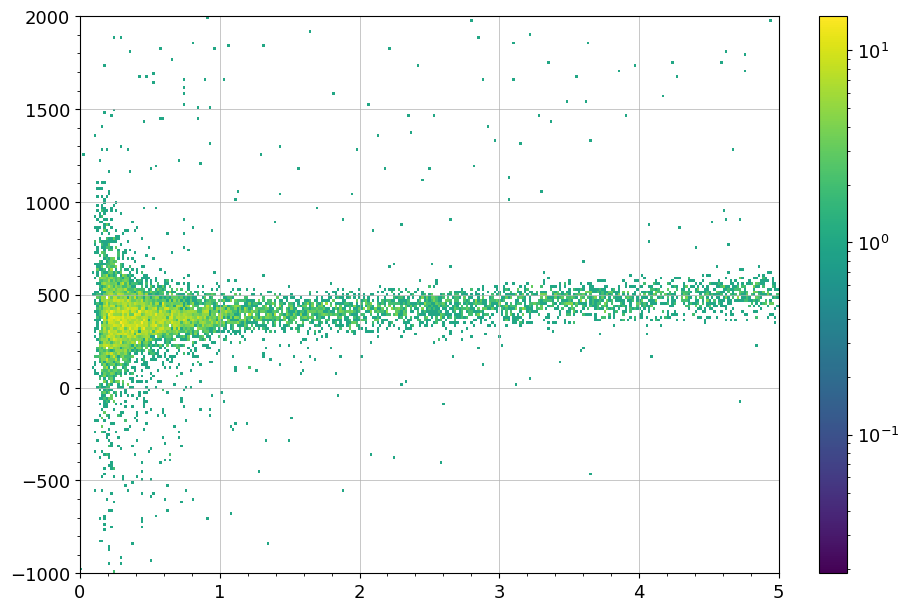

100000


In [4]:
fig = plt.figure()
zcut = z[1][~z[1]["crand"] & z[1]["cbs"]]
h = plt.hist2d(zcut["pt_keVee"],zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],
           bins=[np.linspace(0,5,300),np.linspace(-1000,2000,200)],
            norm='log',vmax=15,vmin=1.9e-2)
fig.colorbar(h[3])
plt.show()
print(len(z[1][~z[1]["crand"] & z[1]["cbs"]]))

In [5]:
z_all = pd.DataFrame(); #z4_all = pd.DataFrame()
for i,x in enumerate(z):
    z_all = pd.concat([z_all,x])

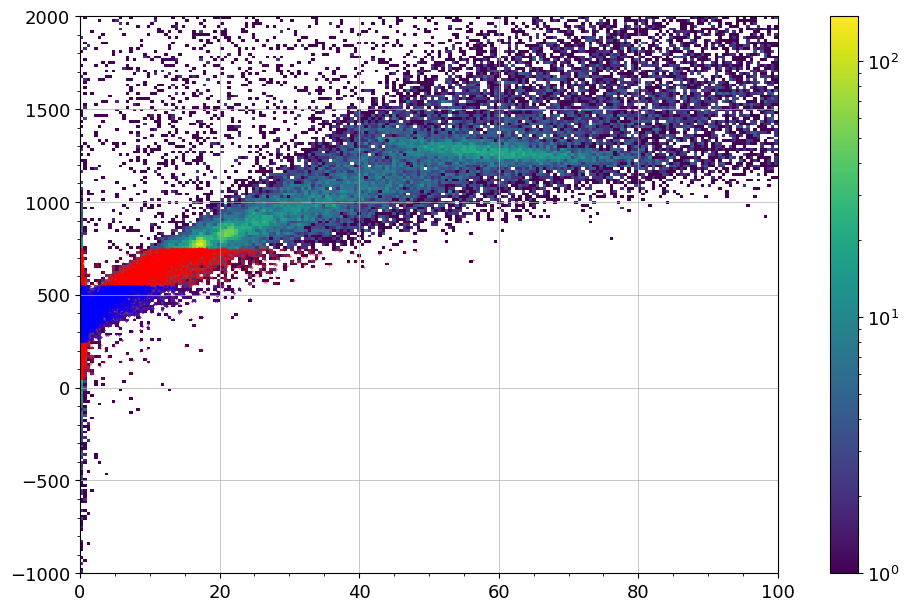

zcut: 100000 cofintl: 16367 cofintt: 8789


In [6]:
fig = plt.figure()

cmap = cm.viridis.copy()
cmap.set_under('w')
x = z[1]
zcut = x[~x["crand"] & (x["BSel"] < 1100)]

h = plt.hist2d(zcut["pt_keVee"],zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],
               bins=[np.linspace(0,100,200),np.linspace(-1000,2000,200)],
               norm = "log",vmax=150)
               #,cmap=cmap,vmin=1e-10)
plt.scatter(zcut["pt_keVee"][zcut["cofintl"]],zcut["PTINTall_PTbscorr"][zcut["cofintl"]]/zcut["PTOFamps"][zcut["cofintl"]]
           ,s=0.1,color='red')
plt.scatter(zcut["pt_keVee"][zcut["cofintt"]],zcut["PTINTall_PTbscorr"][zcut["cofintt"]]/zcut["PTOFamps"][zcut["cofintt"]]
           ,s=0.1,color='blue')
fig.colorbar(h[3])
plt.show()

print("zcut:",len(zcut),"cofintl:",len(zcut[zcut["cofintl"]]),"cofintt:",len(zcut[zcut["cofintt"]]))

There isn't code provided for this one, and the general idea is to show the cuts -- so I'm leaving it as-is for now.

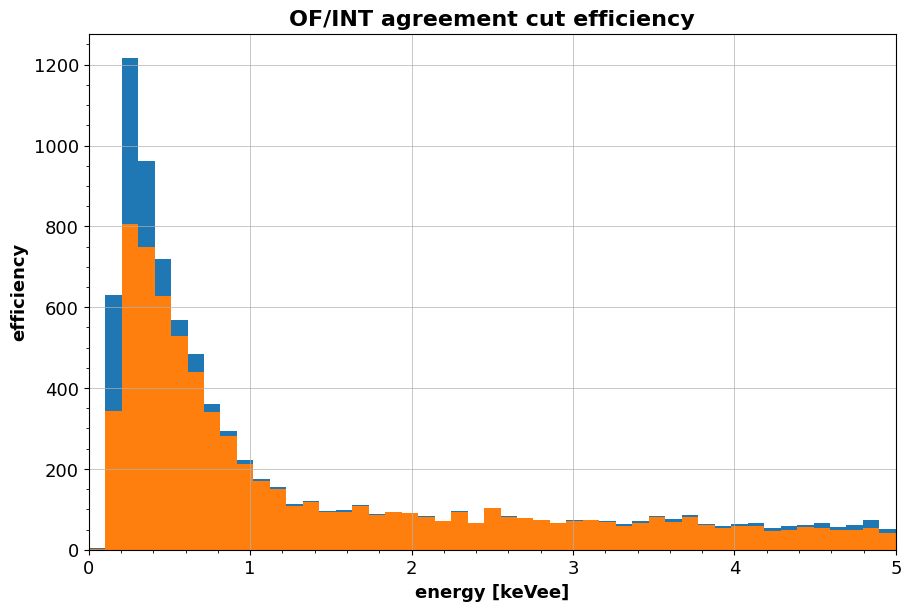

(array([  2., 342., 806., 749., 628., 529., 440., 341., 281., 212., 169.,
       151., 109., 119.,  93.,  94., 108.,  86.,  93.,  90.,  82.,  71.,
        94.,  66., 102.,  81.,  78.,  73.,  66.,  71.,  73.,  69.,  59.,
        66.,  81.,  69.,  81.,  61.,  54.,  59.,  59.,  47.,  50.,  55.,
        54.,  48.,  49.,  54.,  42.]), array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        

In [7]:
zcut = z[1][~z[1]["crand"] & z[1]["cbs"]]
hgood = plt.hist(zcut["pt_keVee"][zcut["cofintl"]],bins=np.linspace(0,5,50))#,align="left")
heff = plt.hist(zcut["pt_keVee"][zcut["cofintt"]],bins=np.linspace(0,5,50))#,align="left")
plt.title("OF/INT agreement cut efficiency")
plt.xlabel("energy [keVee]")
plt.ylabel("efficiency")
plt.xlim(0,5)
plt.show()
print(heff)

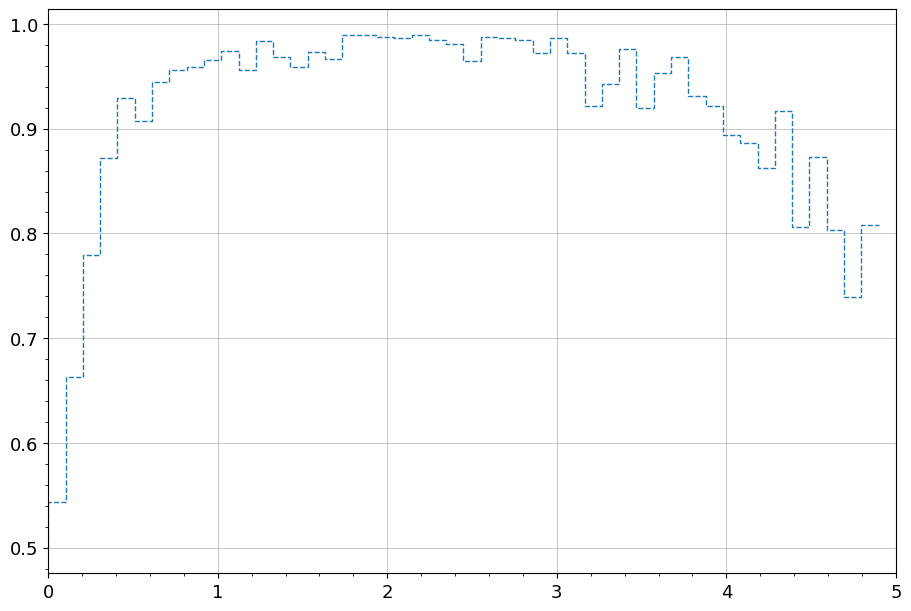

In [8]:
plt.step(heff[1][:-1],heff[0]/hgood[0])
plt.xlim(0,5)
plt.show()

In [9]:
ngood = len(zcut[zcut['cofintl'] & (zcut['pt_keVee'] > 0.035) & (zcut['pt_keVee'] < 0.5)])
npass = len(zcut[zcut['cofintt'] & (zcut['pt_keVee'] > 0.035) & (zcut['pt_keVee'] < 0.5)])
print(npass/ngood)

0.712630359212051


Asked Matt about these, but he said to skip ahead to the improved cut, so we're doing that

### Improved Curved Cut

In [10]:
ser = ["07220916_2059","07220916_2200","07220917_1039","07220917_1225","07220917_2125","07220917_2155"]
ser = ser[::2] #Evens only
#lab = ["0V","-4V","-21V","-65V","-84V","-84V"]
nser = len(ser)

_,z1 = makechain_list(ser,path=datapath,filters=qualityfilters,aliases=qualityaliases,friends=True)
for x in z1:
    x["pt_keV_bscorr"] = x["pt_keV"]/(1-0.0461538*x["BSel"]/165)
    x["pt0_keV_bscorr"] = x["pt0_keV"]/(1-0.0461538*x["BSel"]/165)
    x["pt_keVee"] = 14.0821*x["pt_keV_bscorr"]/(333.899 - x["pt_keV_bscorr"])
    x["pt0_keVee"] = 14.0821*x["pt0_keV_bscorr"]/(333.899 - x["pt0_keV_bscorr"])

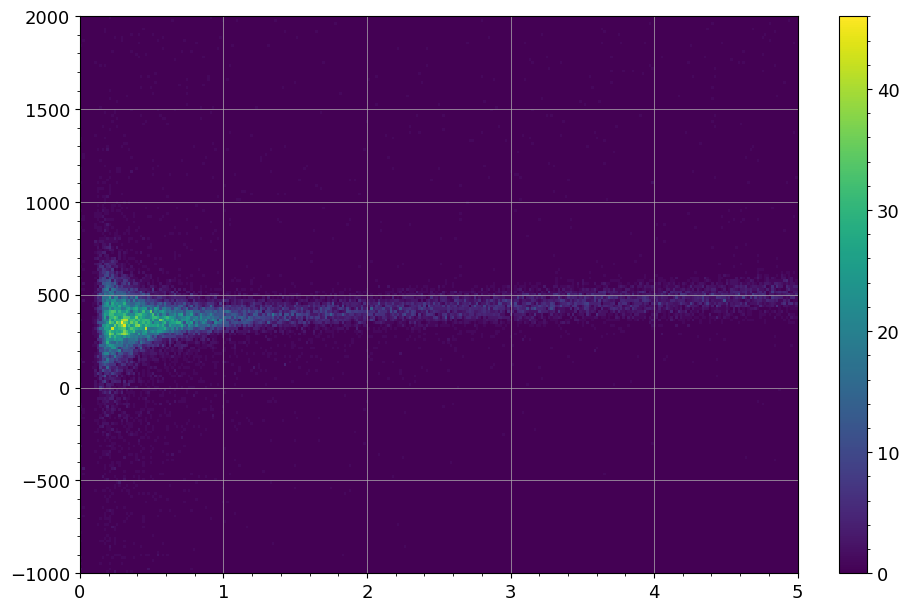

In [11]:
z_all = pd.DataFrame(); #z4_all = pd.DataFrame()
for i,x in enumerate(z1):
    z_all = pd.concat([z_all,x])
x = z_all
zcut = x[~x["crand"] & x["cbs"]]
h = plt.hist2d(zcut["pt_keVee"],zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],
           bins=[np.linspace(0,5,300),np.linspace(-1000,2000,200)])
plt.colorbar(h[3])
plt.show()

In [12]:
edges = [0.1,0.2,0.3,0.4,0.6,0.8,1,1.5,2,3,4,5]
#print(h) #height,x,y
gaus_mod = lf.Model(gaus)
gaus_params = gaus_mod.make_params()
gaus_params.add('A',min=0,value=50)
gaus_params.add('sigma',min=0,value=3)
gaus_params.add('mu',value=400)

<>:12: DeprecationWarning: invalid escape sequence \c
<>:12: DeprecationWarning: invalid escape sequence \c
/tmp/ipykernel_3606282/140050121.py:12: DeprecationWarning: invalid escape sequence \c
  col.text(0.05, 0.95,"$\chi^2$: {:.1f}".format(fits[i*len(row)+j].chisqr),transform=col.transAxes,bbox={'facecolor':'wheat'})
/tmp/ipykernel_3606282/140050121.py:10: RuntimeWarning: divide by zero encountered in divide
  fits.append(gaus_mod.fit(h[0],gaus_params,x=bins,weights=1/np.sqrt(h[0]),nan_policy="omit"))


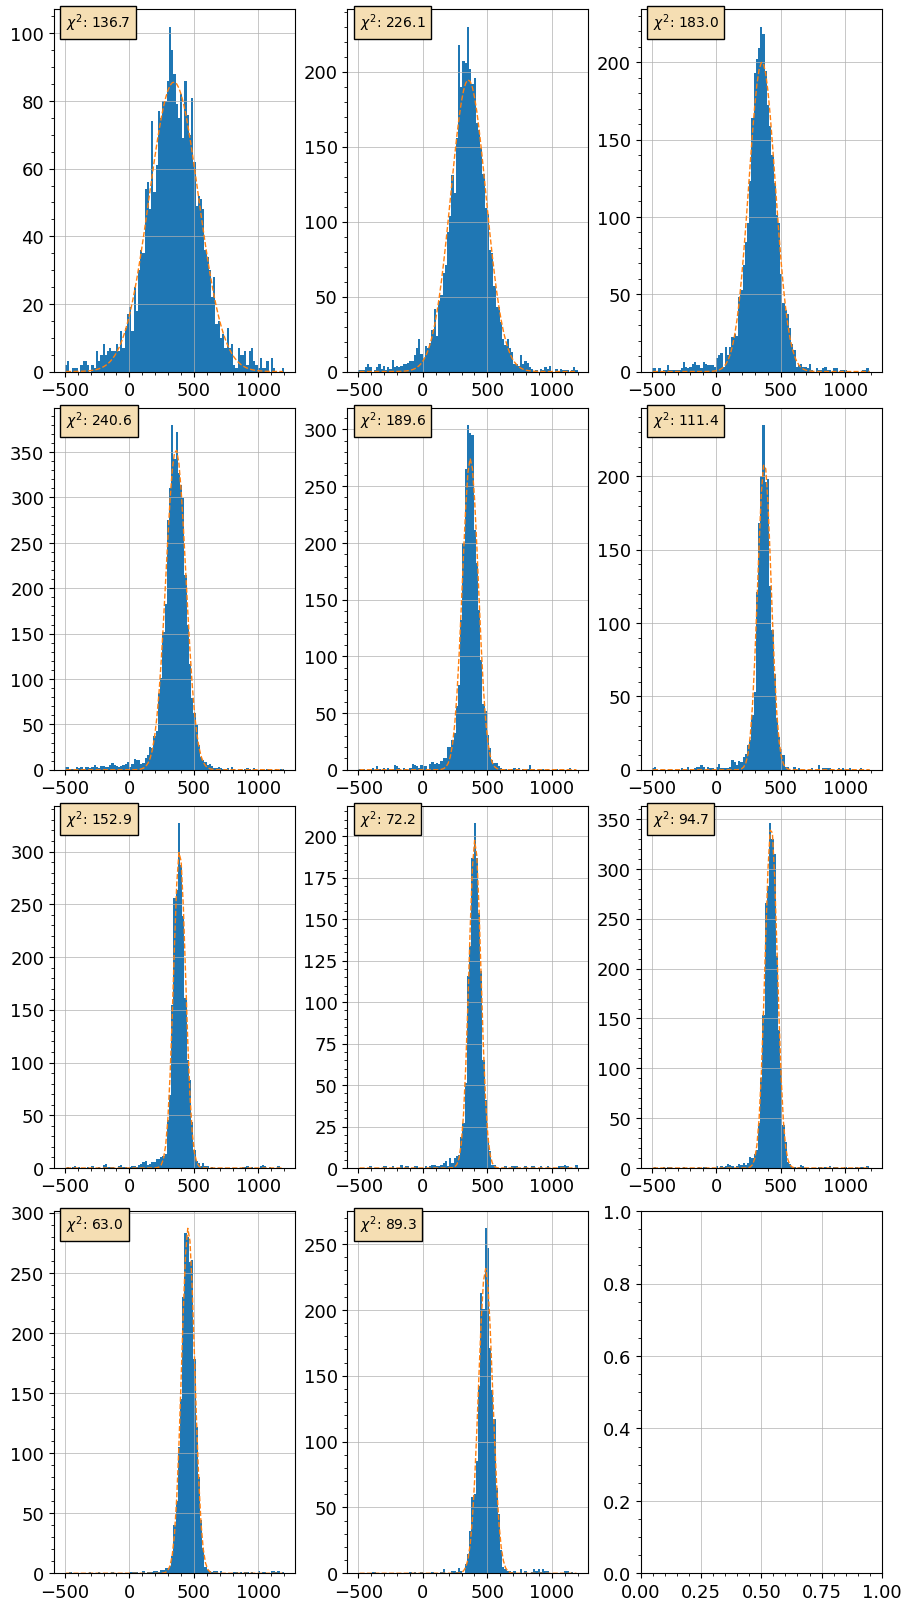

In [13]:
fig,axes = plt.subplots(4,3,figsize=(9,16))
x = z_all
fits = []
for i,row in enumerate(axes):
    for j,col in enumerate(row):
        try:
            zcut = x[~x["crand"] & x["cbs"] & (x["pt_keVee"]>edges[i*len(row)+j]) & (x["pt_keVee"]<edges[i*len(row)+j+1])]
            h = col.hist(zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],bins=np.linspace(-500,1200,100))
            bins = (h[1][:-1]+h[1][1:])/2
            fits.append(gaus_mod.fit(h[0],gaus_params,x=bins,weights=1/np.sqrt(h[0]),nan_policy="omit"))
            col.plot(bins,fits[i*len(row)+j].best_fit)
            col.text(0.05, 0.95,"$\chi^2$: {:.1f}".format(fits[i*len(row)+j].chisqr),transform=col.transAxes,bbox={'facecolor':'wheat'})
        except IndexError: #If there's a prime number of plots then this will occur
            pass

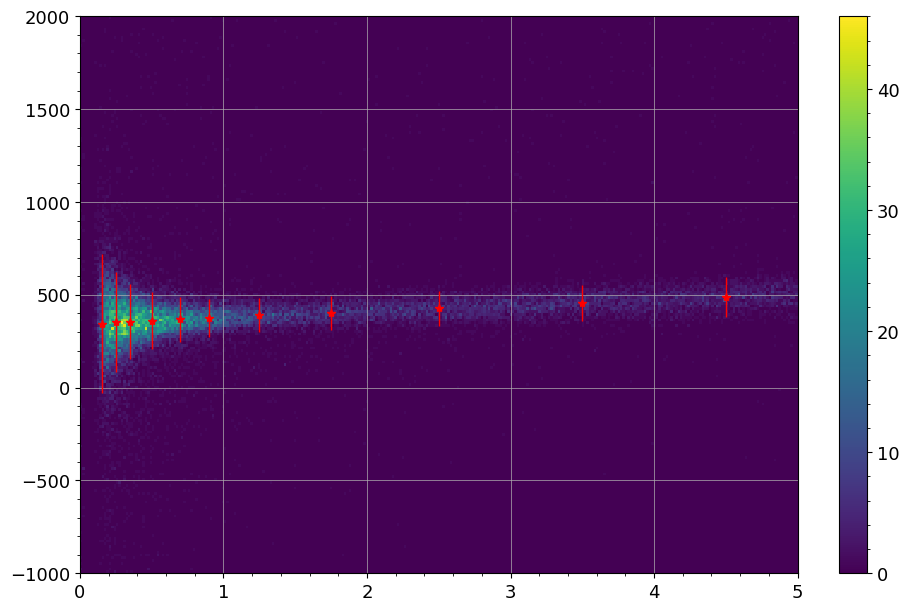

In [14]:
x = z_all
zcut = x[~x["crand"] & x["cbs"]]
h = plt.hist2d(zcut["pt_keVee"],zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],
           bins=[np.linspace(0,5,300),np.linspace(-1000,2000,200)],vmax=46)
plt.colorbar(h[3])
centers = (np.asarray(edges[:-1])+np.asarray(edges[1:]))/2
for i,fit in enumerate(fits):
    plt.errorbar(centers[i],fit.best_values['mu'],1.96*fit.best_values['sigma'],color="red",marker="*")
plt.show()

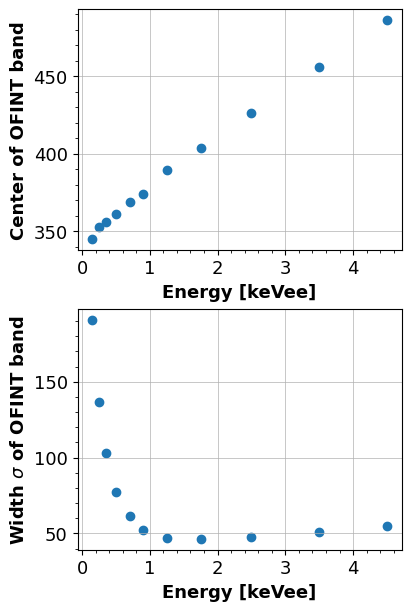

In [15]:
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].scatter(centers,[fit.best_values["mu"] for fit in fits])
ax[1].scatter(centers,[fit.best_values["sigma"] for fit in fits])
ax[0].set_xlabel("Energy [keVee]"); ax[1].set_xlabel("Energy [keVee]")
ax[0].set_ylabel("Center of OFINT band"); ax[1].set_ylabel(r"Width $\sigma$ of OFINT band")
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


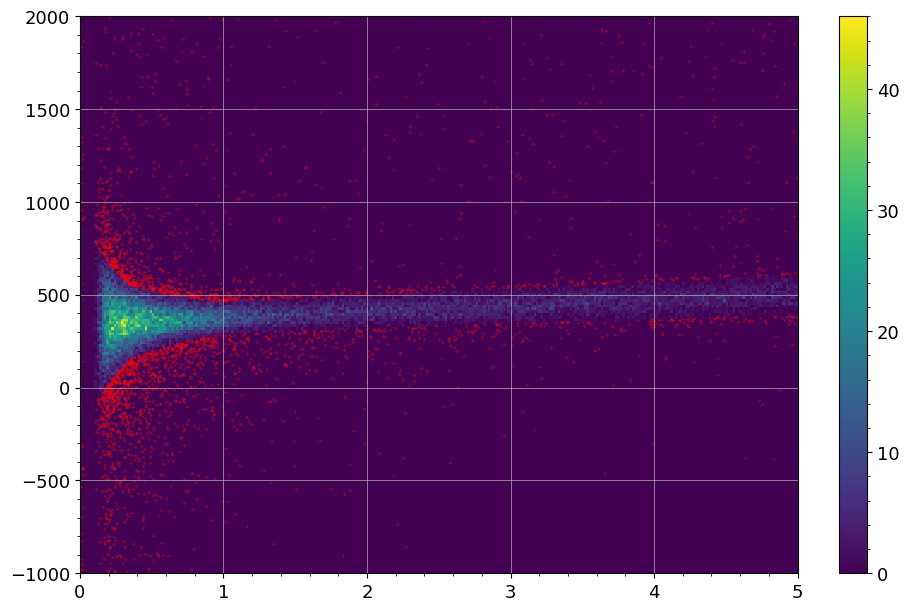

In [16]:
h = plt.hist2d(zcut["pt_keVee"],zcut["PTINTall_PTbscorr"]/zcut["PTOFamps"],
           bins=[np.linspace(0,5,300),np.linspace(-1000,2000,200)],vmax=46)
plt.colorbar(h[3])
z_all["ofint_sig"] = (z_all["pt_keVee"] <  0.3661)*(302.84*np.exp(-3.108*z_all["pt_keVee"])) + ((z_all["pt_keVee"] >= 0.3661) & (z_all["pt_keVee"] < 0.9452))*(42.044*z_all["pt_keVee"]**2 - 143.59*z_all["pt_keVee"] + 144) + (z_all["pt_keVee"]>=0.9452)*(0.5817*z_all["pt_keVee"]**2 - 0.833*z_all["pt_keVee"] + 46.109)
z_all["ofint_ctr"] = 343.7+34.18*z_all["pt_keVee"] - 0.5833*z_all["pt_keVee"]**2
z_all["cofintc"] = (z_all["PTINTall_PTbscorr"]/z_all["PTOFamps"] > z_all["ofint_ctr"] - 1.96*z_all["ofint_sig"]) & (z_all["PTINTall_PTbscorr"]/z_all["PTOFamps"] < z_all["ofint_ctr"] + 1.96*z_all["ofint_sig"])
zcut2 = z_all[~z_all["crand"] & z_all["cbs"] & ~z_all["cofintc"]]
plt.scatter(zcut2["pt_keVee"],zcut2["PTINTall_PTbscorr"]/zcut2["PTOFamps"],color='red',s=0.1)
plt.show()

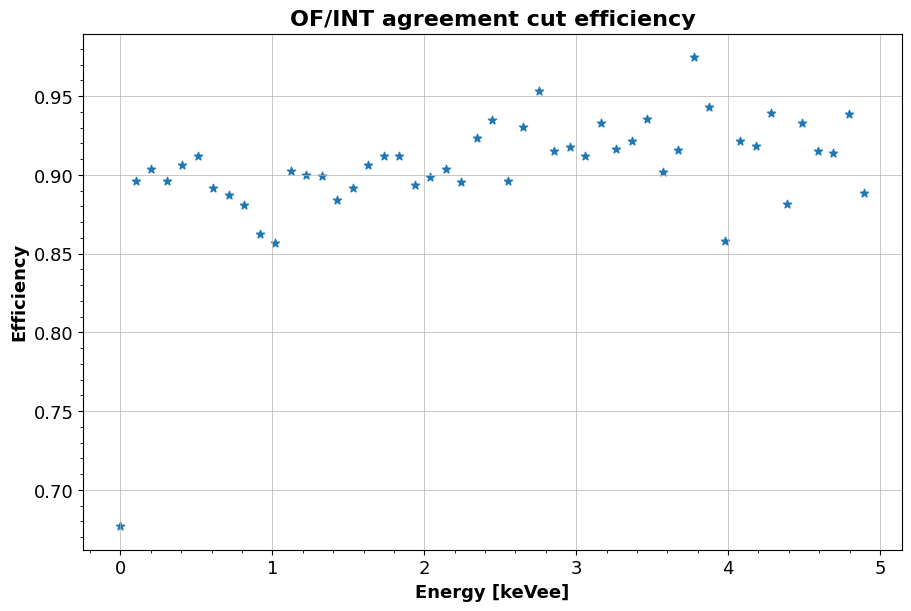

0.9009119035987624


In [17]:
z_all["cofintvl"] = (z_all["PTINTall_PTbscorr"]/z_all["PTOFamps"] > -700) & (z_all["PTINTall_PTbscorr"]/z_all["PTOFamps"] < 1500)
for x in z:
    x["cofintvl"] = (x["PTINTall_PTbscorr"]/x["PTOFamps"] > -700) & (x["PTINTall_PTbscorr"]/x["PTOFamps"] < 1500)
for x in z1:
    x["cofintvl"] = (x["PTINTall_PTbscorr"]/x["PTOFamps"] > -700) & (x["PTINTall_PTbscorr"]/x["PTOFamps"] < 1500)

zcut = z_all[~z_all["crand"] & z_all["cbs"] & z_all["cofintvl"]]
zcut2 = zcut[zcut["cofintc"]]

htotal = np.histogram(zcut["pt_keVee"],bins=np.linspace(0,5,50))
hpass = np.histogram(zcut2["pt_keVee"],bins=np.linspace(0,5,50))

plt.scatter(htotal[1][:-1],hpass[0]/htotal[0],marker="*")

plt.xlabel("Energy [keVee]"); plt.ylabel("Efficiency")
plt.title("OF/INT agreement cut efficiency")
plt.show()

npass = len(z_all[~z_all["crand"] & z_all["cbs"] & z_all["cofintc"] & (z_all["pt_keVee"] > 0.035) & (z_all["pt_keVee"] < 0.5)])
ngood = len(zcut[(zcut["pt_keVee"] > 0.035) & (zcut["pt_keVee"] < 0.5)])
print(npass/ngood)

Not sure how to get the error bars. The function called is defined [here](https://root.cern/doc/master/TH1_8cxx_source.html#l02950) but I don't see how it gets asymmetric results? 

In [18]:
#Check if y-errs should be symmetric
print((htotal[0] < 10) | (hgood[0] < 10))

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


# Phi-based Am-241 source cut
(Now we are on the main page.)

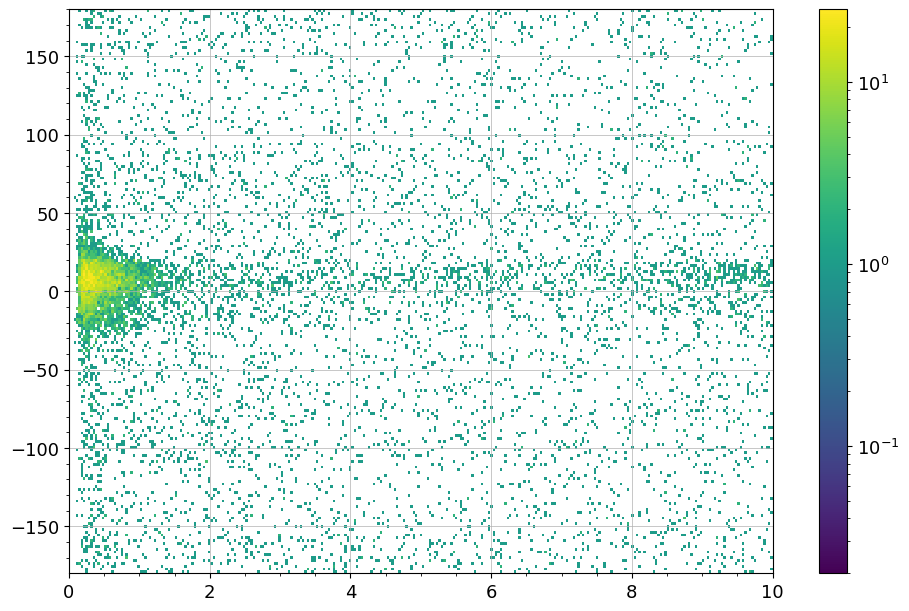

In [19]:
x = z1[0]
zcut = x[~x["crand"] & x["cbs"] & x["cofintl"] & x["cgoodwalk"]]# & (x["pt_keVee"]<1)]
h1phie = plt.hist2d(zcut["pt_keVee"],zcut["phidel"],norm="log",vmin=2e-2,vmax=2.5e+1,
                    bins=(np.linspace(0,10,300),np.linspace(-180,180,200)))
plt.colorbar(h1phie[3])
plt.show()        

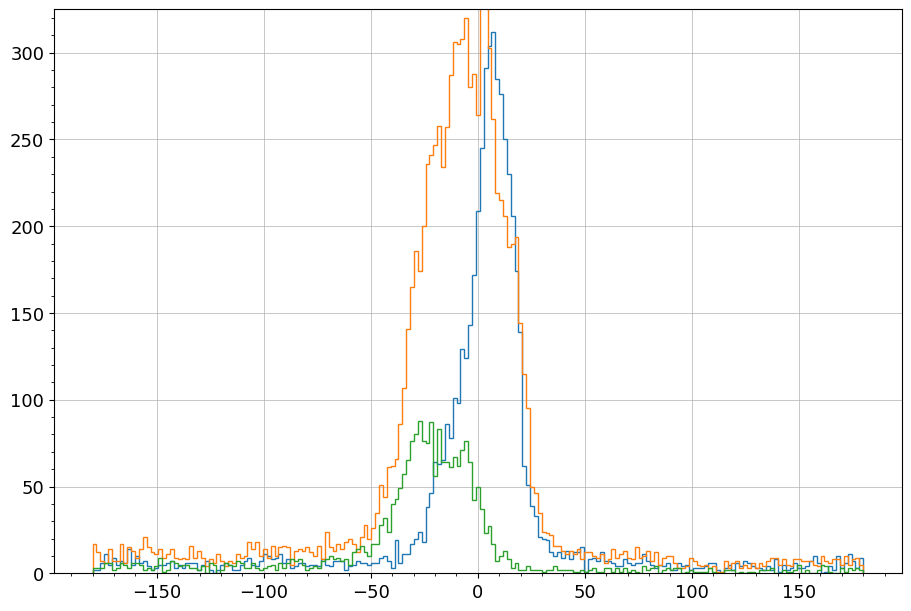

In [20]:
for x in z1[:3]:
    zcut = x[~x["crand"] & x["cbs"] & x["cofintl"] & x["cgoodwalk"] & (x["pt_keVee"]<1)]
    plt.hist(zcut["phidel"],bins=np.linspace(-180,180,200),histtype='step')
plt.ylim(0,325)
plt.show()

I'm not sure if I'm using the same source data, so this may be okay?

### for x in z:
    x["cam"] = (x["phidel"] > -70) & (x["phidel"] < 50)